# Importing Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset:

In [3]:
df=pd.read_csv(r"C:\Users\HP\Documents\DS INTERNSHIP\Heart Disease data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Analysing and Preprocessing:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Insights:
1. There are 1025 records and 14 features.
2. All the features are of numerical data types.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
numerical_variables=['age','trestbps','chol','thalach','oldpeak']
categorical_variables=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Insights:
    No null values present in the dataset.

In [7]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [8]:
df['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [9]:
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [10]:
df['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [11]:
df['exang'].value_counts()

0    680
1    345
Name: exang, dtype: int64

In [12]:
df['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [13]:
df['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [14]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [15]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# Outlier Detection and Treatment:

In [5]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

28.5
80.5


In [6]:
Q1=df['trestbps'].quantile(0.25)
Q3=df['trestbps'].quantile(0.85)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('Lower Limit: ',lower_limit)
print('Upper Limit: ',upper_limit)

df1=df[df['trestbps']<=upper_limit]
print('Length of df1: ',len(df1))

Lower Limit:  75.0
Upper Limit:  195.0
Length of df1:  1021


In [7]:
Q1=df1['chol'].quantile(0.25)
Q3=df1['chol'].quantile(0.95)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('Lower Limit: ',lower_limit)
print('Upper Limit: ',upper_limit)

df2=df1[df1['chol']<=upper_limit]
print('Length of df2:',len(df2))

Lower Limit:  32.5
Upper Limit:  508.5
Length of df2: 1018


In [8]:
Q1=df2['thalach'].quantile(0.25)
Q3=df2['thalach'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('Lower Limit: ',lower_limit)
print('Upper Limit: ',upper_limit)

Lower Limit:  81.0
Upper Limit:  217.0


Insights:
Removed the outliers which are present in the features resting blood pressure,thal.

In [9]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Target counts:

In [13]:
target_df0=df2[df2['target']==0]
target_df1=df2[df2['target']==1]
print('Target 0: ',len(target_df0))
print('Target 1: ',len(target_df1))

Target 0:  495
Target 1:  523


## Age:

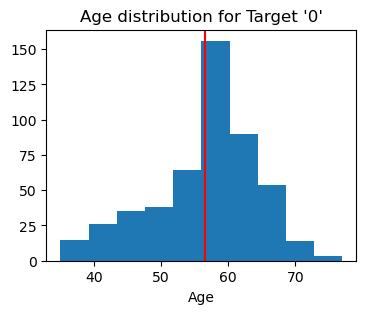

In [15]:
plt.figure(figsize=(4,3))
plt.hist(x='age',data=target_df0)
plt.axvline(target_df0['age'].mean(),color='red')
plt.xlabel('Age')
plt.title("Age distribution for Target '0'")
plt.show()

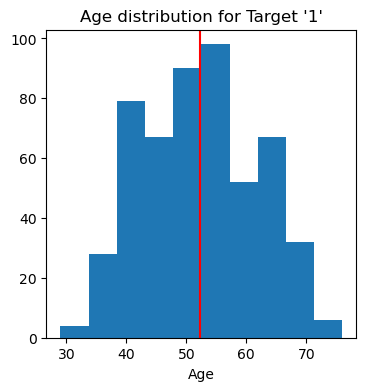

In [16]:
plt.figure(figsize=(4,4))
plt.hist(x='age',data=target_df1)
plt.axvline(target_df1['age'].mean(),color='red')
plt.xlabel('Age')
plt.title("Age distribution for Target '1'")
plt.show()

## Sex:

In [17]:
df_sex0=df2[df2['sex']==0]
df_sex0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [18]:
df_sex0['target'].value_counts()

1    223
0     82
Name: target, dtype: int64

In [19]:
df_sex1=df2[df2['sex']==1]
df_sex1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [20]:
df_sex1['target'].value_counts()

0    413
1    300
Name: target, dtype: int64

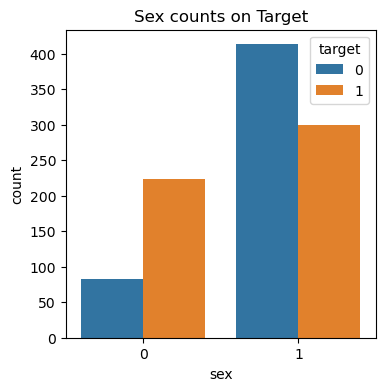

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=df2, hue='target')
plt.title('Sex counts on Target')
plt.show()

## Cp:

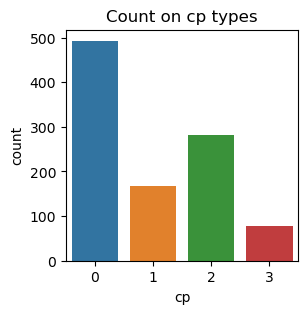

In [22]:
plt.figure(figsize=(3,3))
sns.countplot(x='cp',data=df2)
plt.title('Count on cp types')
plt.show()

In [23]:
df_cp0=df2[df2['cp']==0]
df_cp0['target'].value_counts()

0    371
1    122
Name: target, dtype: int64

In [24]:
df_cp1=df2[df2['cp']==1]
df_cp1['target'].value_counts()

1    134
0     33
Name: target, dtype: int64

In [25]:
df_cp2=df2[df2['cp']==2]
df_cp2['target'].value_counts()

1    216
0     65
Name: target, dtype: int64

In [26]:
df_cp3=df2[df2['cp']==3]
df_cp3['target'].value_counts()

1    51
0    26
Name: target, dtype: int64

## trestbps:

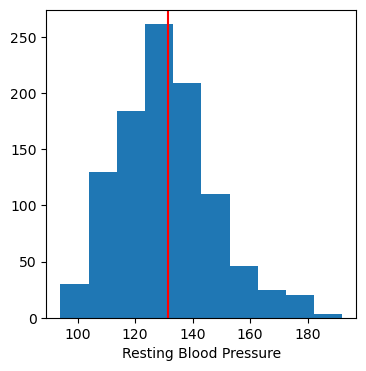

In [27]:
plt.figure(figsize=(4,4))
plt.hist(x='trestbps',data=df2)
plt.xlabel('Resting Blood Pressure')
plt.axvline(df2['trestbps'].mean(),color='red')
plt.show()

In [28]:
df_trestbps_0=df2[df2['target']==0]
df_trestbps_0['trestbps'].describe()

count    495.000000
mean     133.573737
std       17.676184
min      100.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      192.000000
Name: trestbps, dtype: float64

In [29]:
df_trestbps_1=df2[df2['target']==1]
df_trestbps_1['trestbps'].describe()

count    523.000000
mean     129.326960
std       16.122085
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps, dtype: float64

## chol:

In [30]:
df_chol_0=df2[df2['target']==0]
df_chol_0['chol'].describe()

count    495.000000
mean     250.995960
std       49.648522
min      131.000000
25%      217.000000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

In [31]:
df_chol_1=df2[df2['target']==1]
df_chol_1['chol'].describe()

count    523.000000
mean     239.126195
std       47.150157
min      126.000000
25%      207.500000
50%      234.000000
75%      265.000000
max      417.000000
Name: chol, dtype: float64

## fbs:

In [32]:
df_fbs0=df2[df2['fbs']==0]
df_fbs0['target'].value_counts()

1    452
0    417
Name: target, dtype: int64

In [33]:
df_cp1=df2[df2['fbs']==1]
df_cp1['target'].value_counts()

0    78
1    71
Name: target, dtype: int64

In [34]:
df_target_1=df2[(df2['sex']==0) & (df2['fbs']==0)]
df_target_1['target'].value_counts()

1    204
0     63
Name: target, dtype: int64

In [35]:
df_target_2=df2[(df2['sex']==1) & (df2['fbs']==1)]
df_target_2['target'].value_counts()

0    59
1    52
Name: target, dtype: int64

In [36]:
df_target_3=df2[(df2['sex']==0) & (df2['fbs']==1)]
df_target_3['target'].value_counts()

0    19
1    19
Name: target, dtype: int64

In [37]:
df_target_4=df2[(df2['sex']==1) & (df2['fbs']==0)]
df_target_4['target'].value_counts()

0    354
1    248
Name: target, dtype: int64

Insights:
    Sex type 0 with fbs 0 has most of the people affected by heart disease.

## restecg:

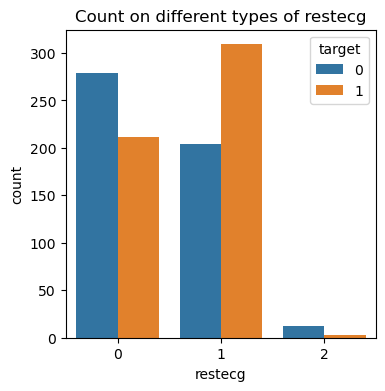

In [38]:
plt.figure(figsize=(4,4))
sns.countplot(x='restecg',hue='target',data=df2)
plt.title('Count on different types of restecg')
plt.show()

## thalach:

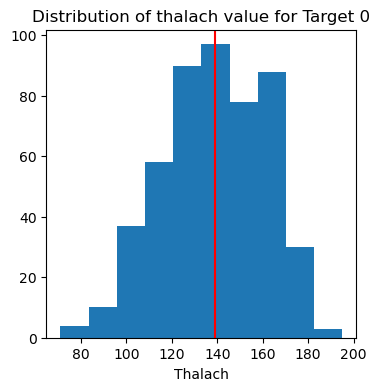

In [39]:
plt.figure(figsize=(4,4))
plt.hist(x='thalach',data=target_df0)
plt.axvline(target_df0['thalach'].mean(),color='red')
plt.title('Distribution of thalach value for Target 0')
plt.xlabel('Thalach')
plt.show()

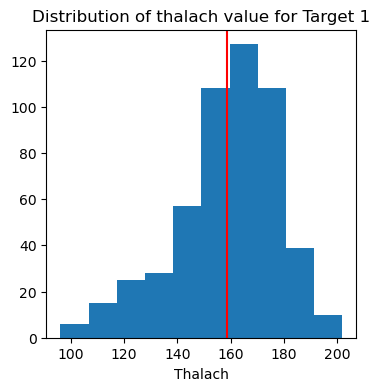

In [40]:
plt.figure(figsize=(4,4))
plt.hist(x='thalach',data=target_df1)
plt.axvline(target_df1['thalach'].mean(),color='red')
plt.title('Distribution of thalach value for Target 1')
plt.xlabel('Thalach')
plt.show()

In [41]:
target_df0['thalach'].describe()

count    495.000000
mean     139.179798
std       22.649637
min       71.000000
25%      125.000000
50%      142.000000
75%      156.500000
max      195.000000
Name: thalach, dtype: float64

In [42]:
target_df1['thalach'].describe()

count    523.000000
mean     158.577438
std       19.151424
min       96.000000
25%      148.500000
50%      162.000000
75%      172.000000
max      202.000000
Name: thalach, dtype: float64

## exang:

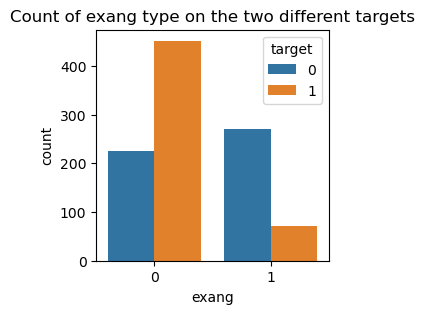

In [43]:
plt.figure(figsize=(3,3))
sns.countplot(x='exang',data=df2, hue='target')
plt.title('Count of exang type on the two different targets')
plt.show()

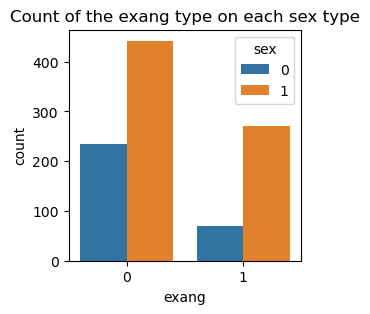

In [44]:
plt.figure(figsize=(3,3))
sns.countplot(x='exang',data=df2, hue='sex')
plt.title('Count of the exang type on each sex type')
plt.show()

## oldpeak:

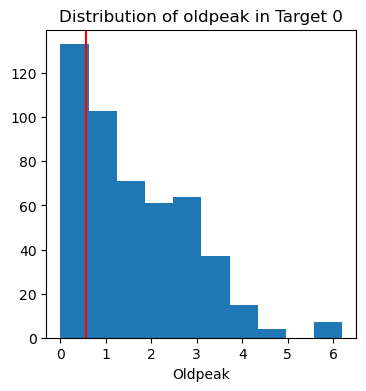

In [45]:
plt.figure(figsize=(4,4))
plt.hist(x='oldpeak',data=target_df0)
plt.axvline(target_df1['oldpeak'].mean(),color='red')
plt.title('Distribution of oldpeak in Target 0')
plt.xlabel('Oldpeak')
plt.show()

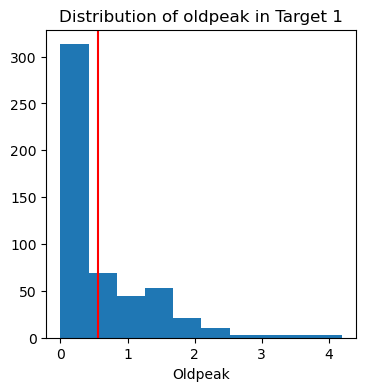

In [46]:
plt.figure(figsize=(4,4))
plt.hist(x='oldpeak',data=target_df1)
plt.axvline(target_df1['oldpeak'].mean(),color='red')
plt.title('Distribution of oldpeak in Target 1')
plt.xlabel('Oldpeak')
plt.show()

In [47]:
target_df0['oldpeak'].describe()

count    495.000000
mean       1.580808
std        1.277909
min        0.000000
25%        0.600000
50%        1.400000
75%        2.500000
max        6.200000
Name: oldpeak, dtype: float64

In [48]:
target_df1['oldpeak'].describe()

count    523.000000
mean       0.564054
std        0.769316
min        0.000000
25%        0.000000
50%        0.200000
75%        1.000000
max        4.200000
Name: oldpeak, dtype: float64

## slope:

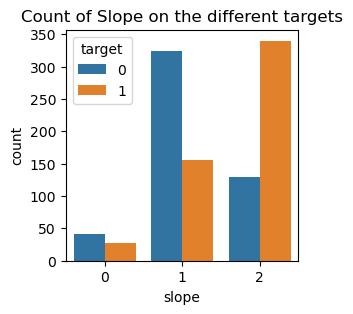

In [49]:
plt.figure(figsize=(3,3))
sns.countplot(x='slope',hue='target',data=df2)
plt.title('Count of Slope on the different targets')
plt.show()

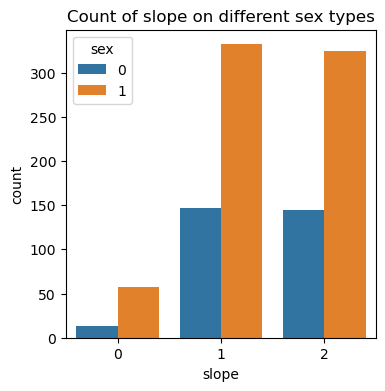

In [50]:
plt.figure(figsize=(4,4))
sns.countplot(x='slope',hue='sex',data=df2)
plt.title('Count of slope on different sex types')
plt.show()

## ca:

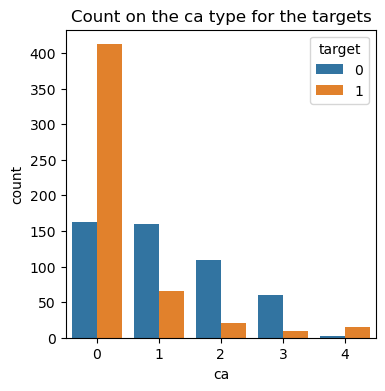

In [51]:
plt.figure(figsize=(4,4))
sns.countplot(x='ca',hue='target',data=df2)
plt.title('Count on the ca type for the targets')
plt.show()

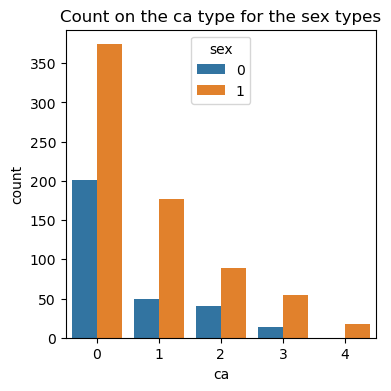

In [52]:
plt.figure(figsize=(4,4))
sns.countplot(x='ca',hue='sex',data=df2)
plt.title('Count on the ca type for the sex types')
plt.show()

## thal:

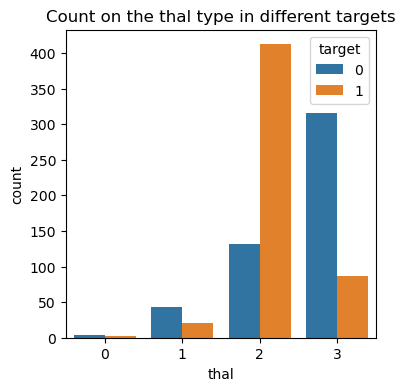

In [53]:
plt.figure(figsize=(4,4))
sns.countplot(x='thal',hue='target',data=df2)
plt.title('Count on the thal type in different targets')
plt.show()

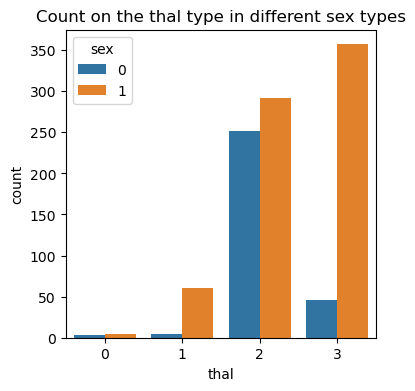

In [54]:
plt.figure(figsize=(4,4))
sns.countplot(x='thal',hue='sex',data=df2)
plt.title('Count on the thal type in different sex types' )
plt.show()

## Feature Correlation:

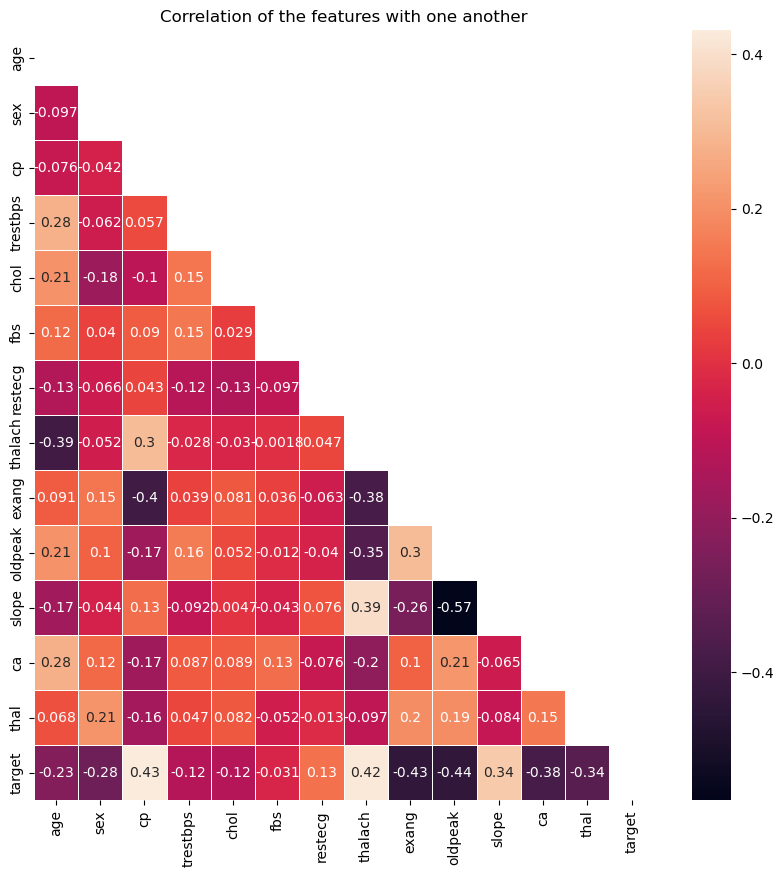

In [55]:
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(df2.corr(),dtype=bool))
sns.heatmap(df2.corr(),annot=True,mask=mask,linewidths=0.5)
plt.title('Correlation of the features with one another')
plt.show()

# Finding key factors using Random Forest algorithm:

In [56]:
X=df2.drop('target',axis=1)
y=df2.target

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1,min_samples_leaf=20,oob_score=True,random_state=42)
rf.fit(X_train,y_train)

print('Train Acc.Score: ',round(rf.score(X_train,y_train),2))
print('Test Acc.Score: ',round(rf.score(X_test,y_test),2))

Train Acc.Score:  0.9
Test Acc.Score:  0.85


<AxesSubplot:>

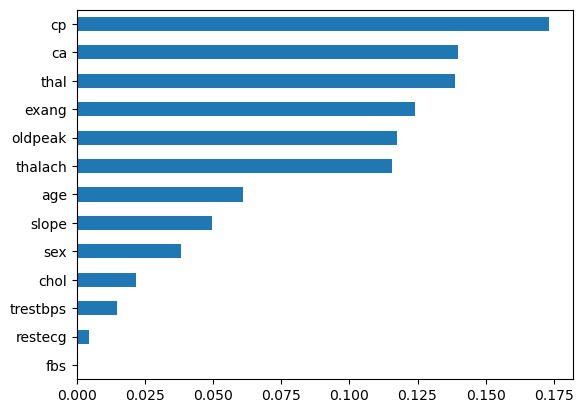

In [76]:
from matplotlib.pyplot import figure
feature_imp=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=True)
feature_imp.plot(kind='barh')

## Permutation Importance:

In [81]:
from sklearn.inspection import permutation_importance
#Calculate permutation importance for test data:

result_test=permutation_importance(rf,X_test,y_test,n_repeats=20,random_state=42,n_jobs=2)

sorted_imp_idx_test=result_test.importances_mean.argsort()
imp_test=pd.DataFrame(result_test.importances[sorted_imp_idx_test].T,columns=X.columns[sorted_imp_idx_test])

In [82]:
#Calcultate permutation importances for training data:

result_train=permutation_importance(rf,X_train,y_train,n_repeats=20,random_state=42,n_jobs=2)

sorted_imp_idx_train=result_train.importances_mean.argsort()
imp_train=pd.DataFrame(result_train.importances[sorted_imp_idx_train].T,columns=X.columns[sorted_imp_idx_train])

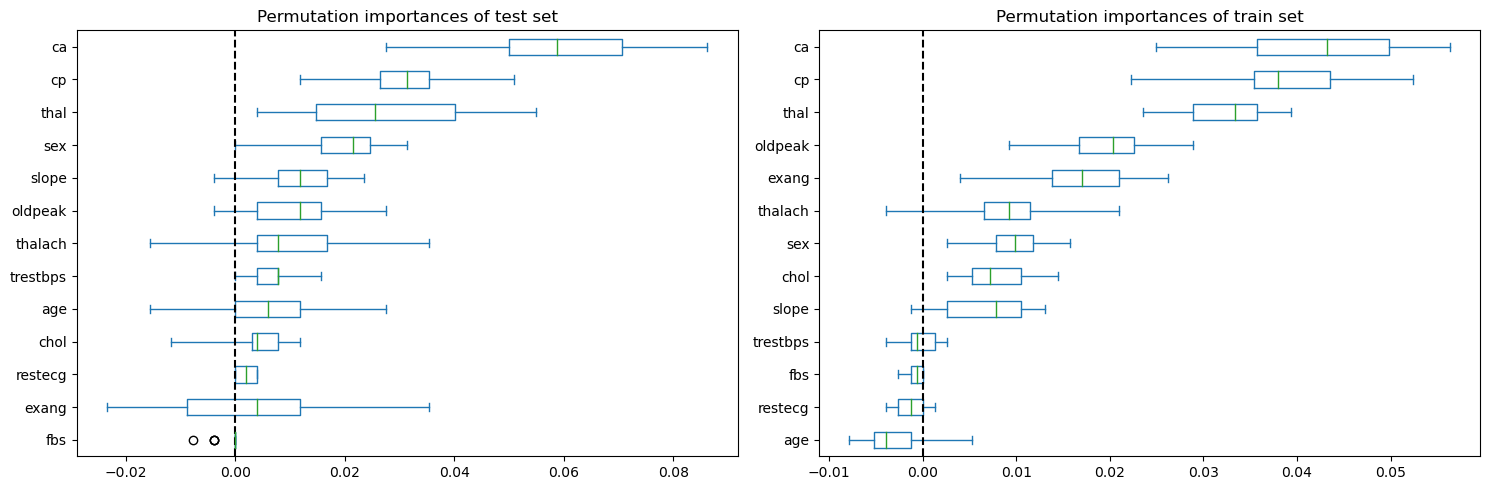

In [87]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
imp_test.plot.box(vert=False,whis=10,ax=axes[0])
axes[0].set_title('Permutation importances of test set')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].figure.tight_layout()

imp_train.plot.box(vert=False,whis=10,ax=axes[1])
axes[1].set_title('Permutation importances of train set')
axes[1].axvline(x=0,color='k',linestyle='--')
axes[1].figure.tight_layout()

The test set shows 'ca','cp','thal'are the most important features and 'exang','fbs' have low importances. The box plot shows the distribution of decrease in accuracy scorewith the N repeat permutation(N=20 in our case).

The training set shows 'ca','cp','thal'are the most important features in top ranking and the rest of the features have diffeence in ranking on comparison with the test set. This may be due to the overfitting of the model.


There is no high correlation between the features in this dataset as we have seen in the correlation heatmap. Therefore from the permutation importances we can conclude that the key factors for the predicting the target would be 'ca','cp',and 'thal'.

# Recursive Feature Elimination Cross Validation:

In [71]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rfecv=RFECV(estimator=RandomForestClassifier(),min_features_to_select=4,n_jobs=-1,scoring='accuracy',cv=5)
rfecv.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(), min_features_to_select=4,
      n_jobs=-1, scoring='accuracy')

In [72]:
X_train.columns[rfecv.support_]

Index(['age', 'cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

# Conclusion: